<a href="https://colab.research.google.com/github/yerinsally/2022ITB/blob/main/%EA%B2%BD%EC%98%81%ED%95%99%EB%B6%80_2013872_%EC%A0%95%EC%98%88%EB%A6%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2020년도 건강검진정보 샘플(1만건) 데이터를 이용하여 시각화 과정,
즉 탐색적 데이터 분석을 수행하고 검진결과의 특징을 보여주시오.
- matplotlib/seaborn/pandas 패키지를 이용하고, 필요하다면 엑셀 또는 파이썬 코드로 데이터 전처리 수행 
- 이용한 차트의 종류가 3가지 이상이어야 함 (산점도, 막대 그래프, 라인 그래프 등)
- 시각화 결과를 해석하고  3가지의 인사이트 도출하기 
- 코드는 github에 올리고 주소 제출

In [3]:
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [151]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ITB/data/health_data.csv', encoding = 'utf-8')
data.head()

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

In [7]:
data.describe()

,기준년도,가입자일련번호,시도코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,구강검진수검여부,치아우식증유무,치석
count,10000.0,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,3977.000000,9912.000000,9861.000000,9912.000000,9912.00000,9912.000000,9912.000000,10000.000000,3251.000000,3251.000000
mean,2020.0,5000.50000,34.100100,11.931400,160.983500,63.034500,82.366100,0.933750,0.936750,1.050500,...,116.263264,14.214255,1.119461,0.848484,27.58979,26.789851,38.098668,0.325100,0.175331,0.579514
std,0.0,2886.89568,12.394581,2.166048,9.211608,12.205294,9.561973,0.662057,0.641378,0.227936,...,37.829955,1.555386,0.489782,0.301012,17.88442,23.735687,58.184579,0.468436,0.380308,0.591269
min,2020.0,1.00000,11.000000,9.000000,130.000000,30.000000,53.000000,0.100000,0.100000,1.000000,...,13.000000,5.100000,1.000000,0.050000,3.00000,2.000000,3.000000,0.000000,0.000000,0.000000
25%,2020.0,2500.75000,27.000000,10.000000,155.000000,55.000000,76.000000,0.700000,0.700000,1.000000,...,89.000000,13.200000,1.000000,0.700000,20.00000,16.000000,16.000000,0.000000,0.000000,0.000000
50%,2020.0,5000.50000,41.000000,12.000000,160.000000,60.000000,82.000000,0.900000,0.900000,1.000000,...,115.000000,14.200000,1.000000,0.800000,24.00000,21.000000,24.000000,0.000000,0.000000,1.000000
75%,2020.0,7500.25000,44.000000,13.000000,170.000000,70.000000,88.900000,1.200000,1.200000,1.000000,...,141.000000,15.300000,1.000000,1.000000,30.00000,31.000000,39.000000,1.000000,0.000000,1.000000
max,2020.0,10000.00000,49.000000,18.000000,195.000000,130.000000,134.000000,9.900000,9.900000,3.000000,...,297.000000,20.000000,6.000000,9.200000,692.00000,1146.000000,2322.000000,1.000000,1.000000,2.000000


# 데이터 전처리

In [8]:
# 기준년도, 가입자 일련번호, 데이터 공개일자 칼럼 삭제
data_new = data.drop(['기준년도', '가입자일련번호', '데이터공개일자'], axis = 'columns')
data_new

,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),...,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석
0,36,M,9,165,60,72.1,1.2,1.5,1,1,...,1.0,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN
1,27,F,13,150,65,81.0,0.8,0.8,1,1,...,1.0,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN
2,11,F,12,155,55,70.0,0.6,0.7,1,1,...,1.0,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN
3,31,M,13,160,70,90.8,1.0,1.0,1,2,...,1.0,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0
4,41,F,12,155,50,75.2,1.5,1.2,1,1,...,1.0,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,44,F,13,155,55,83.0,1.2,1.2,1,1,...,1.0,0.7,20.0,21.0,20.0,No,Yes,0,NaN,NaN
9996,43,F,11,160,55,77.5,1.0,1.2,1,1,...,1.0,0.7,24.0,22.0,21.0,No,Yes,1,0.0,0.0
9997,45,M,12,160,80,93.0,0.6,0.6,1,1,...,1.0,1.0,22.0,27.0,35.0,No,No,0,NaN,NaN
9998,27,F,15,155,55,78.0,0.6,1.0,1,1,...,NaN,1.0,26.0,24.0,21.0,No,No,0,NaN,NaN


In [9]:
data_new.isna().sum()

시도코드              0
성별코드              0
연령대코드(5세단위)       0
신장(5Cm단위)         0
체중(5Kg 단위)        0
허리둘레              0
시력(좌)             0
시력(우)             0
청력(좌)             0
청력(우)             0
수축기혈압            88
이완기혈압            88
식전혈당(공복혈당)       88
총콜레스테롤         5956
트리글리세라이드       5956
HDL콜레스테롤       5956
LDL콜레스테롤       6023
혈색소              88
요단백             139
혈청크레아티닌          88
(혈청지오티)AST       88
(혈청지오티)ALT       88
감마지티피            88
흡연상태              2
음주여부              1
구강검진수검여부          0
치아우식증유무        6749
치석             6749
dtype: int64

In [10]:
# 시도코드, 성별코드, 연령대코드(5세단위) 행 변경
data_new['시도코드'] = data_new['시도코드'].replace([11,26,27,28,29,30,31,36,41,42,43,44,45,46,47,48,49],['서울특별시','부산광역시','대구광역시','인천광역시','광주광역시','대전광역시','울산광역시','세종특별자치시','경기도','강원도','충청북도','충청남도','전라북도','전라남도','경상북도','경상남도','제주특별자치도'])
data_new = data_new.rename(columns={'시도코드':'시도'})

In [11]:
data_new['성별코드'] = data_new['성별코드'].replace(['M','F'],['남','여'])
data_new = data_new.rename(columns={'성별코드':'성별'})

In [12]:
data_new['연령대코드(5세단위)'] = data_new['연령대코드(5세단위)'].replace([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],['0~4세','5~9세','10~14세','15~19세','20~24세','25~29세','30~34세','35~39세','40~44세','45~49세','50~54세','55~59세','60~64세','65~69세','70~74세','75~79세','80~84세','85세+'])
data_new = data_new.rename(columns={'연령대코드(5세단위)':'연령'})

In [13]:
data_new.head()

,시도,성별,연령,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),...,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석
0,세종특별자치시,남,40~44세,165,60,72.1,1.2,1.5,1,1,...,1.0,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN
1,대구광역시,여,60~64세,150,65,81.0,0.8,0.8,1,1,...,1.0,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN
2,서울특별시,여,55~59세,155,55,70.0,0.6,0.7,1,1,...,1.0,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN
3,울산광역시,남,60~64세,160,70,90.8,1.0,1.0,1,2,...,1.0,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0
4,경기도,여,55~59세,155,50,75.2,1.5,1.2,1,1,...,1.0,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN


# 데이터 시각화

In [14]:
import pandas as pd

import seaborn as sns
sns.set_style("whitegrid")

In [15]:
%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumBarunGothic


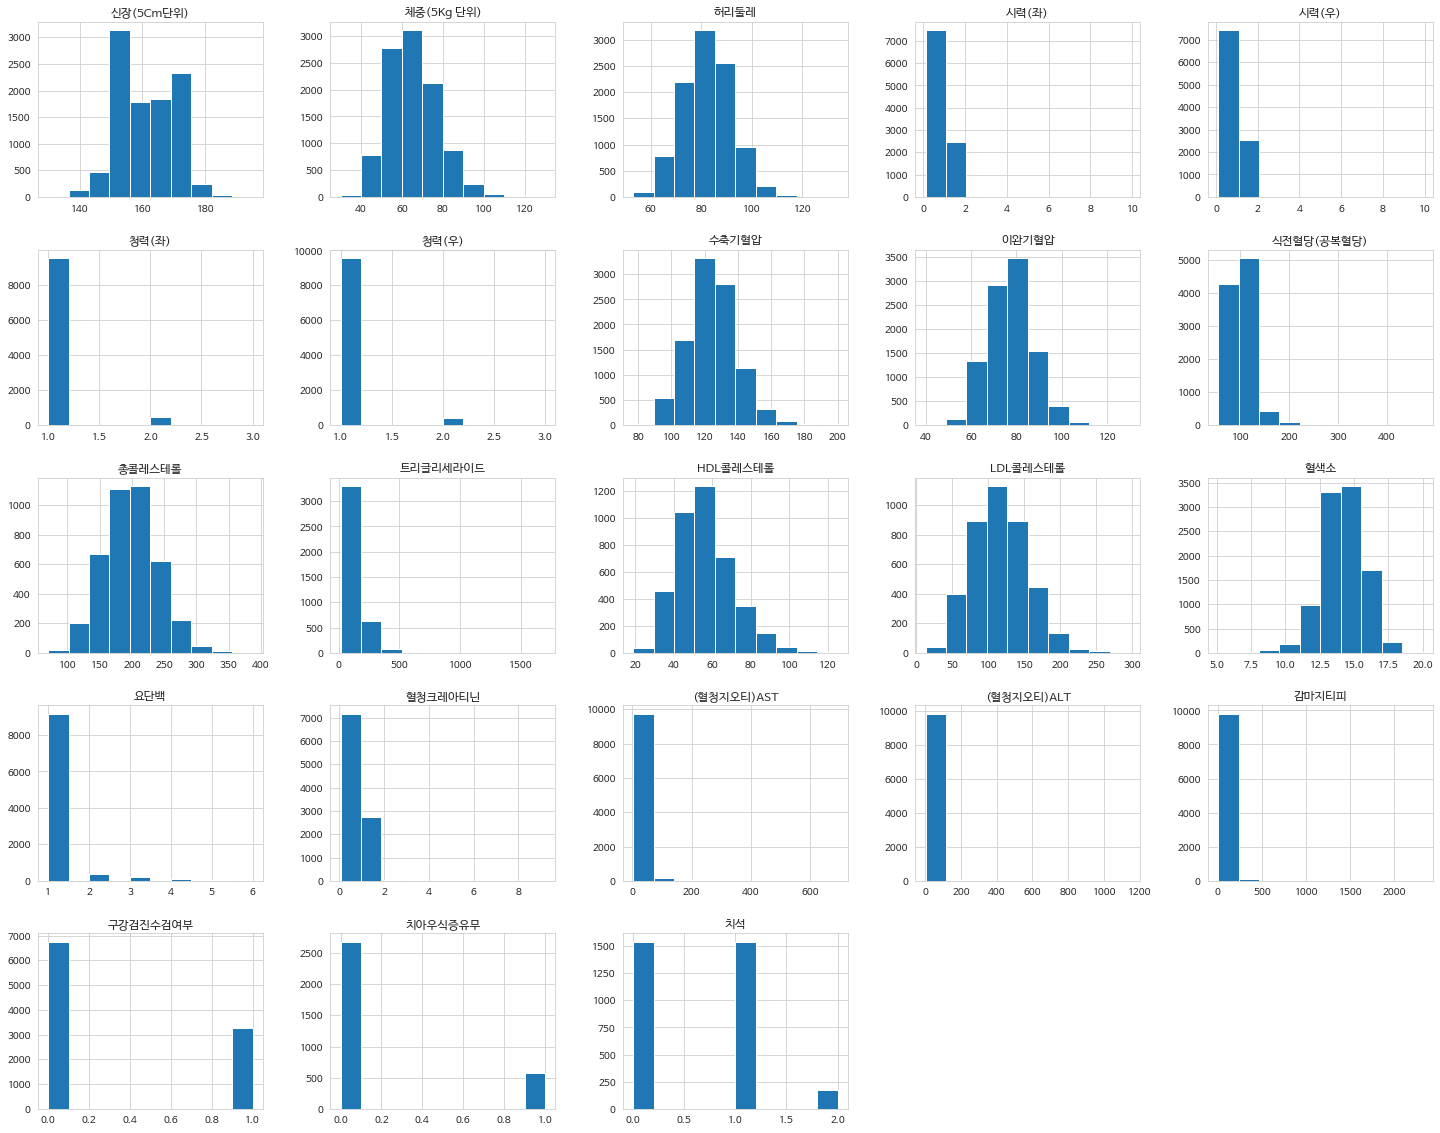

In [30]:
plt.rcParams['figure.figsize'] = [20, 10]
data_new.hist(figsize=(25,20));

## 1. BMI 지수와 고혈압 관계 파악하기
- 체질량 지수(BMI)는 비만도를 나타내는 지수로, 구하는 방법은 체중(kg) / 키(m)^2이다. 일반적으로 남성은 22, 여성은 21이 표준이다.
- 고혈압은 수축기 혈압과 이완기 혈압을 기준으로 판정한다.


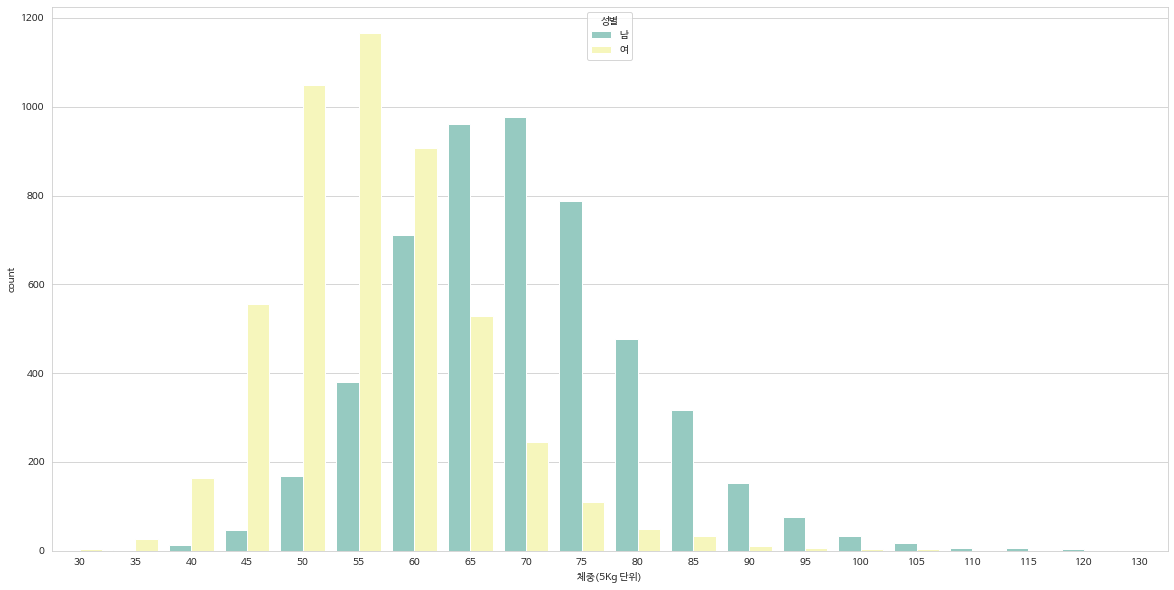

In [49]:
# 성별 체중 차이 확인 확인
sns.countplot(data = data_new, x="체중(5Kg 단위)", hue = "성별", palette='Set3')

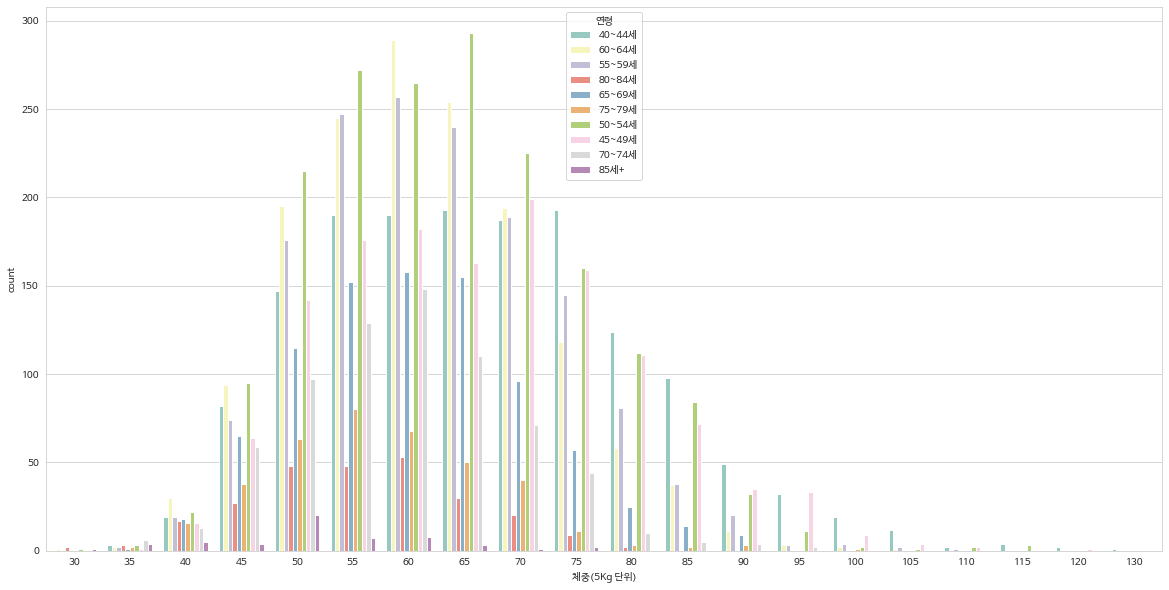

In [48]:
# 연령대별 체중 차이 확인
sns.countplot(data = data_new, x="체중(5Kg 단위)", hue = "연령", palette='Set3')

In [43]:
# BMI 지수 구하기 : 키는 m 단위
data_new['BMI 지수'] = data_new['체중(5Kg 단위)'] / (data_new['신장(5Cm단위)']/100*data_new['신장(5Cm단위)']/100)

# 18.5 이하 = 저체중, 23 이하 = 정상, 25 이하 = 과체중, 25 초과 = 비만
result = [] 
for i in  data_new['BMI 지수']: 
    if i < 18.5:
      result.append('저체중') 
    elif i < 23:
      result.append('정상')
    elif i < 25:
      result.append('과체중')
    else:
      result.append('비만')        
data_new['비만판정'] = result

data_new.head()

,시도,성별,연령,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),...,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,BMI 지수,비만판정
0,세종특별자치시,남,40~44세,165,60,72.1,1.2,1.5,1,1,...,21.0,27.0,21.0,No,No,0,NaN,NaN,22.038567,정상
1,대구광역시,여,60~64세,150,65,81.0,0.8,0.8,1,1,...,18.0,15.0,15.0,No,No,0,NaN,NaN,28.888889,비만
2,서울특별시,여,55~59세,155,55,70.0,0.6,0.7,1,1,...,27.0,25.0,7.0,No,No,0,NaN,NaN,22.892820,정상
3,울산광역시,남,60~64세,160,70,90.8,1.0,1.0,1,2,...,65.0,97.0,72.0,No,No,1,0.0,0.0,27.343750,비만
4,경기도,여,55~59세,155,50,75.2,1.5,1.2,1,1,...,18.0,17.0,14.0,No,No,0,NaN,NaN,20.811655,정상


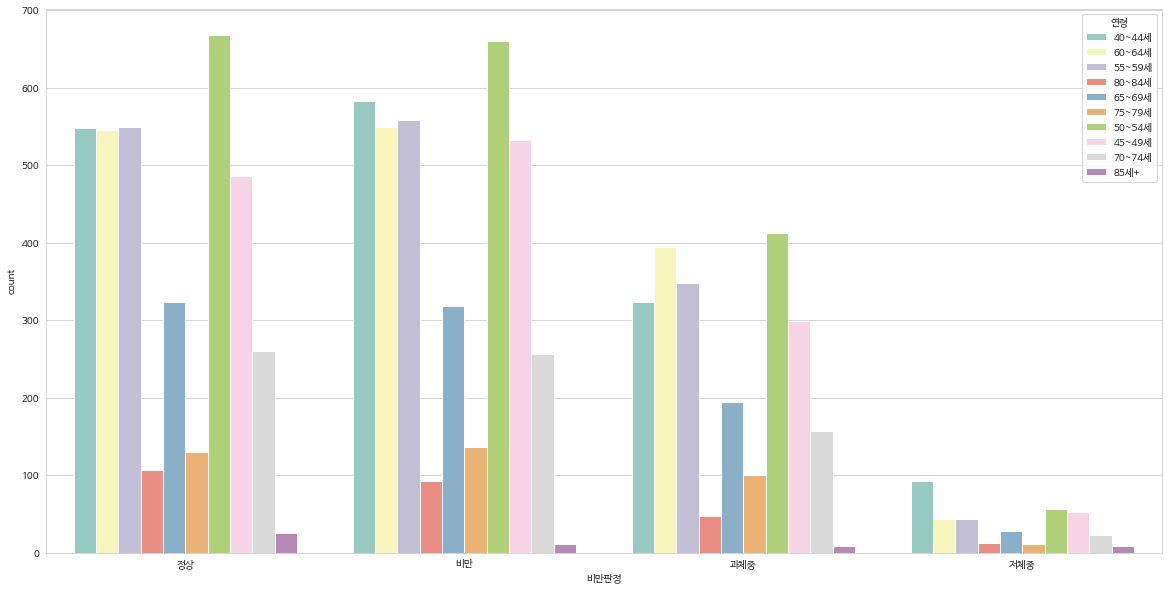

In [47]:
sns.countplot(data = data_new, x="비만판정", hue = "연령", palette='Set3')

In [50]:
# 고혈압 판정 전, 수축기 & 이완기 혈압 내 결측치 값 제거 후 데이터프레임 만들기
data1 = data_new
data1.dropna(subset=['수축기혈압'], inplace = True)

In [51]:
data1.info() # 88개 값 제거 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9912 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   시도          9912 non-null   object 
 1   성별          9912 non-null   object 
 2   연령          9912 non-null   object 
 3   신장(5Cm단위)   9912 non-null   int64  
 4   체중(5Kg 단위)  9912 non-null   int64  
 5   허리둘레        9912 non-null   float64
 6   시력(좌)       9912 non-null   float64
 7   시력(우)       9912 non-null   float64
 8   청력(좌)       9912 non-null   int64  
 9   청력(우)       9912 non-null   int64  
 10  수축기혈압       9912 non-null   float64
 11  이완기혈압       9912 non-null   float64
 12  식전혈당(공복혈당)  9912 non-null   float64
 13  총콜레스테롤      4044 non-null   float64
 14  트리글리세라이드    4044 non-null   float64
 15  HDL콜레스테롤    4044 non-null   float64
 16  LDL콜레스테롤    3977 non-null   float64
 17  혈색소         9912 non-null   float64
 18  요단백         9861 non-null   float64
 19  혈청크레아티닌     9912 non-null  

In [55]:
# 혈압 기준으로 고혈압 측정
result = []
for i,j in zip(data1['수축기혈압'], data1['이완기혈압']):
  if (i >= 140) or (j >= 90):
    result.append('고혈압')
  elif (i >= 120) and (i <= 129):
    result.append('주의혈압')
  elif (i >= 130) or (j >= 80):
    result.append('고혈압 전단계')
  else:
    result.append('정상')

data1['고혈압판정'] = result
data1.head()

,시도,성별,연령,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),...,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,BMI 지수,비만판정,고혈압판정
0,세종특별자치시,남,40~44세,165,60,72.1,1.2,1.5,1,1,...,27.0,21.0,No,No,0,NaN,NaN,22.038567,정상,주의혈압
1,대구광역시,여,60~64세,150,65,81.0,0.8,0.8,1,1,...,15.0,15.0,No,No,0,NaN,NaN,28.888889,비만,정상
2,서울특별시,여,55~59세,155,55,70.0,0.6,0.7,1,1,...,25.0,7.0,No,No,0,NaN,NaN,22.892820,정상,주의혈압
3,울산광역시,남,60~64세,160,70,90.8,1.0,1.0,1,2,...,97.0,72.0,No,No,1,0.0,0.0,27.343750,비만,고혈압 전단계
4,경기도,여,55~59세,155,50,75.2,1.5,1.2,1,1,...,17.0,14.0,No,No,0,NaN,NaN,20.811655,정상,고혈압


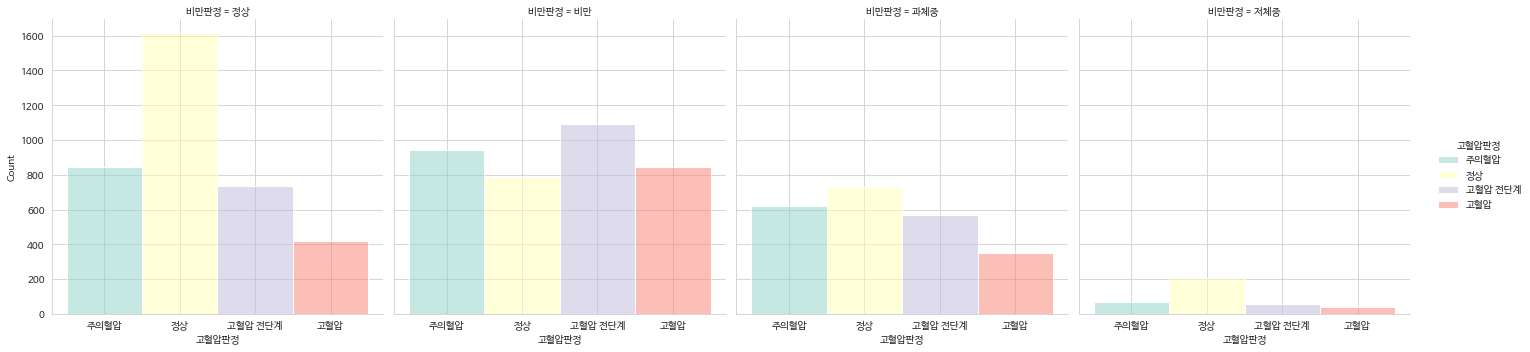

In [78]:
sns.displot(data1, x="고혈압판정", hue="고혈압판정", col = "비만판정", palette='Set3')

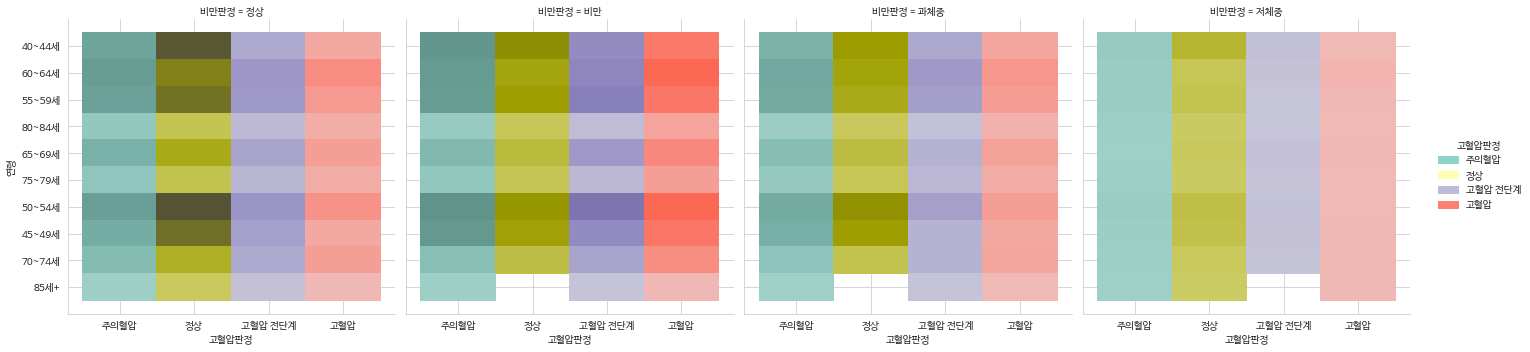

In [84]:
sns.displot(data1, x="고혈압판정", y="연령", hue="고혈압판정", col = "비만판정", palette='Set3')

위 그래프를 보면 비만판정이 정상이면 고혈압판정이 정상인 경우가 많고, 비만판정이 비만이면 고혈압판정이 고혈압전단계와 주의혈압이 많은 것을 알 수 있다. 비만판정이 과체중이거나 저체중일 경우에는 정상인 경우가 많다. 또한 비만일 때 고혈압의 빈도가 가장 높은 것을 확인할 수 있다. 따라서, 비만판정과 고혈압판정은 유의미한 관계가 존재한다.
다음 연령별로 확인해본 결과, 비만인 경우 40 ~ 44세, 50 ~ 54세, 55 ~ 59세, 60 ~ 64세에서 농도가 진한 것을 볼 수 있다, 

## 2. 흡연 및 음주 여부에 따른 간 기능 파악하기
- 간 기능은 (혈청지오티)AST, (혈청지오티)ALT, 감마지티피 세 지표로 판단한다. 세 지표 모두 증가하면 간 기능이 악화된다.




In [125]:
data_new[["(혈청지오티)ALT", "(혈청지오티)AST"]].describe()

,(혈청지오티)ALT,(혈청지오티)AST
count,9912.000000,9912.00000
mean,26.789851,27.58979
std,23.735687,17.88442
min,2.000000,3.00000
25%,16.000000,20.00000
50%,21.000000,24.00000
75%,31.000000,30.00000
max,1146.000000,692.00000


In [86]:
# AST, ALT 상관관계 시각화 : 먼저 400 초과하는 이상치 제거하기
data2 = data_new[(data_new["(혈청지오티)AST"] < 400) & (data_new["(혈청지오티)ALT"] < 400)]

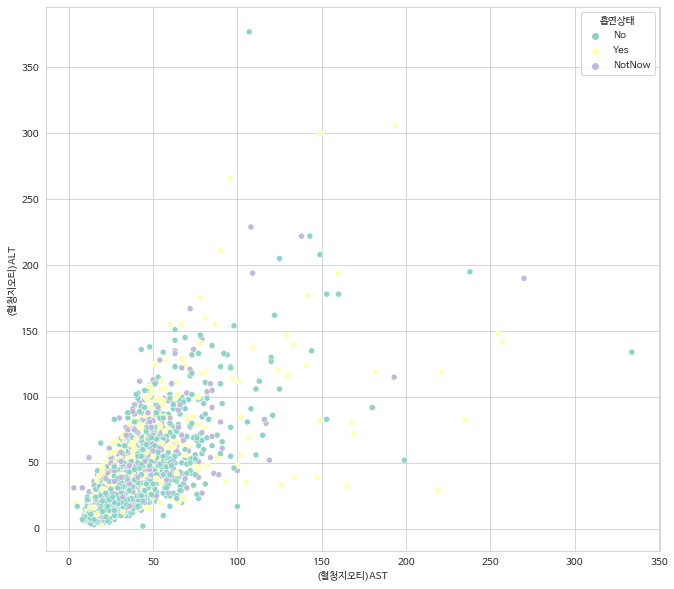

In [94]:
plt.figure(figsize=(11, 10))
sns.scatterplot(data = data2, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="흡연상태", palette='Set3')

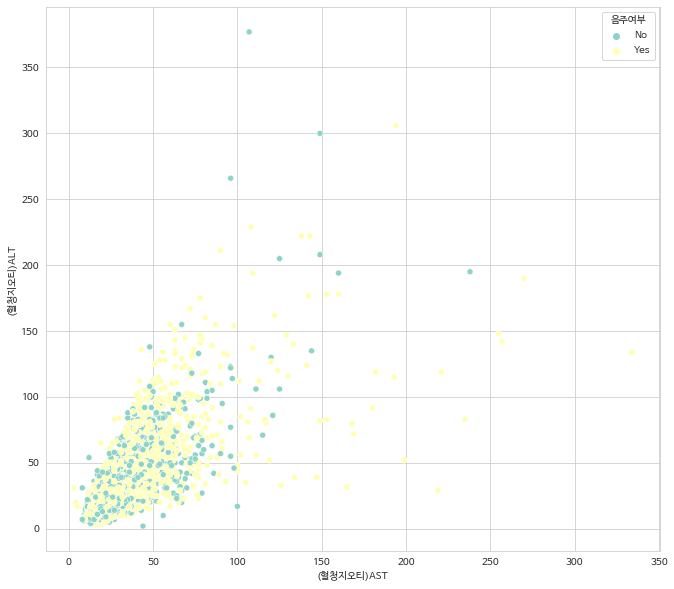

In [95]:
plt.figure(figsize=(11, 10))
sns.scatterplot(data = data2, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", palette='Set3')

AST와 ALT 척도는 서로 양의 상관관계를 가지는 것을 확인할 수 있다.

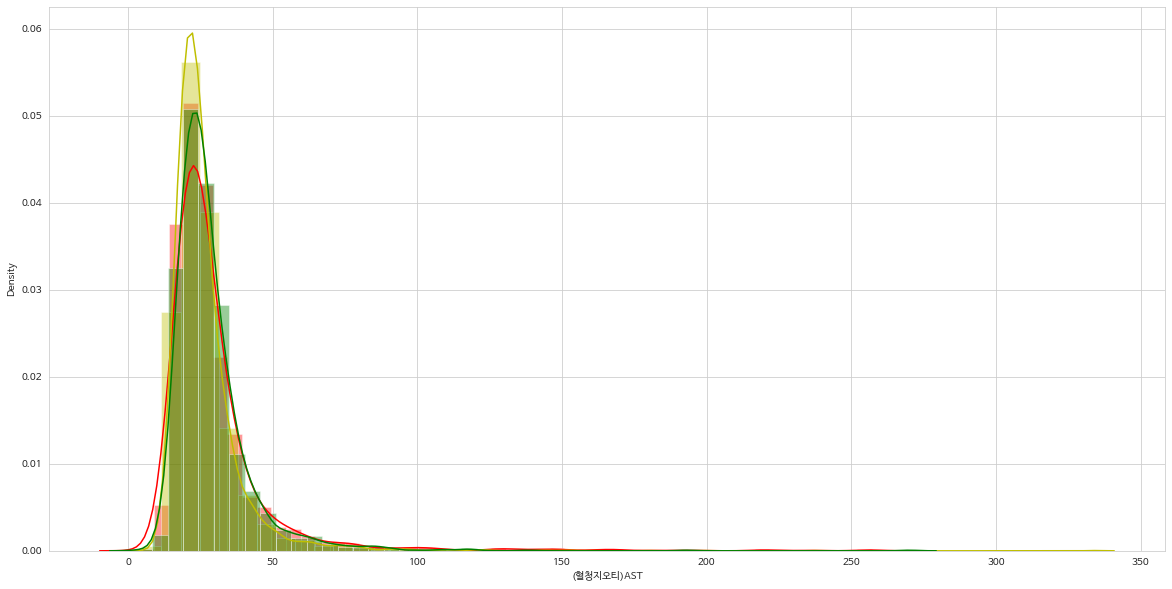

In [153]:
# 흡연상태에 따른 AST/ALT/감마지티피 비교
sns.distplot(data2.loc[
    data2["(혈청지오티)AST"].notnull() & (data2["흡연상태"] == 'Yes'), 
    "(혈청지오티)AST"], color = 'r')

sns.distplot(data2.loc[
    data2["(혈청지오티)AST"].notnull() & (data2["흡연상태"] == 'No'), 
    "(혈청지오티)AST"], color = 'y')

sns.distplot(data2.loc[
    data2["(혈청지오티)AST"].notnull() & (data2["흡연상태"] == 'NotNow'), 
    "(혈청지오티)AST"], color = 'g')

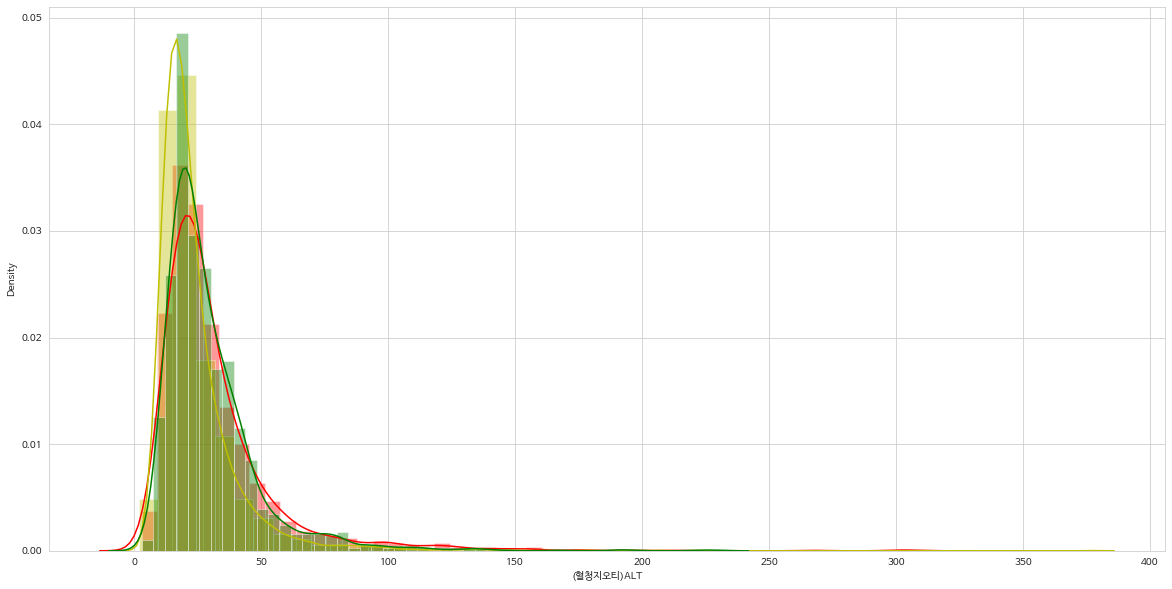

In [154]:
sns.distplot(data2.loc[
    data2["(혈청지오티)ALT"].notnull() & (data2["흡연상태"] == 'Yes'), 
    "(혈청지오티)ALT"], color = 'r')

sns.distplot(data2.loc[
    data2["(혈청지오티)ALT"].notnull() & (data2["흡연상태"] == 'No'), 
    "(혈청지오티)ALT"], color = 'y')

sns.distplot(data2.loc[
    data2["(혈청지오티)ALT"].notnull() & (data2["흡연상태"] == 'NotNow'), 
    "(혈청지오티)ALT"], color = 'g')

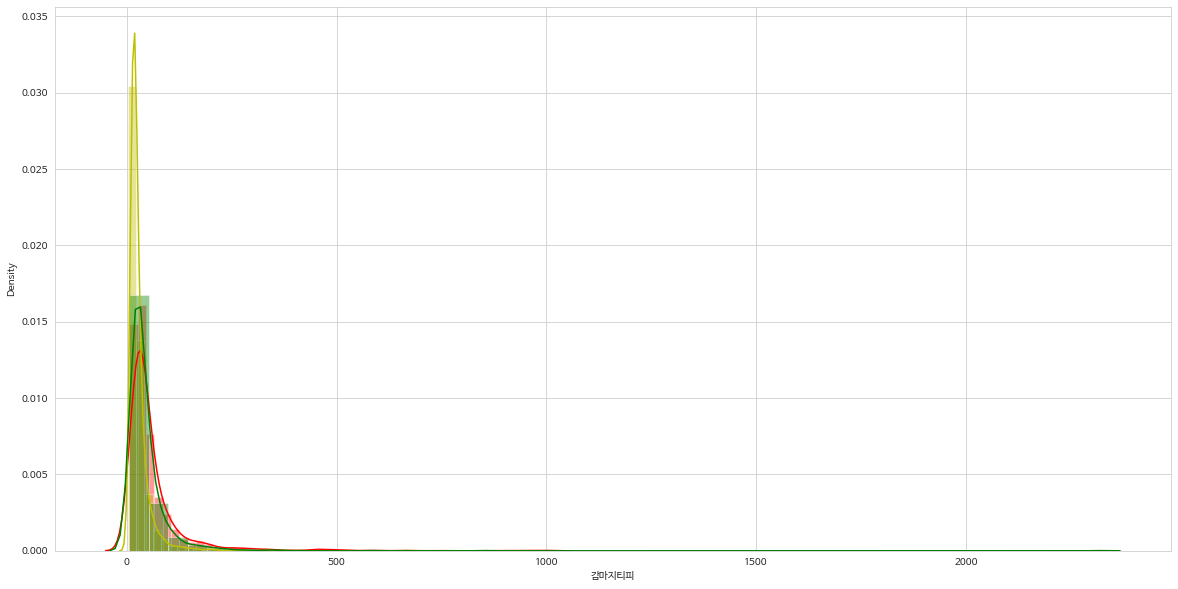

In [155]:
sns.distplot(data2.loc[
    data2["감마지티피"].notnull() & (data2["흡연상태"] == 'Yes'), 
    "감마지티피"], color = 'r')

sns.distplot(data2.loc[
    data2["감마지티피"].notnull() & (data2["흡연상태"] == 'No'), 
    "감마지티피"], color = 'y')

sns.distplot(data2.loc[
    data2["감마지티피"].notnull() & (data2["흡연상태"] == 'NotNow'), 
    "감마지티피"], color = 'g')

그래프의 치우침을 확인해보면, AST/ALT/감마지티피 모두 빨강/초록/노랑 즉 흡연상태가 Yes/NotNow/No 순서이다. 이는 흡연을 하고 있거나, 했지만 그만둔 경우가 흡연을 하지 않는 경우보다 간 기능의 척도인 AST, ALT, 감마지티피의 값이 모두 높다는 것을 확인할 수 있다.

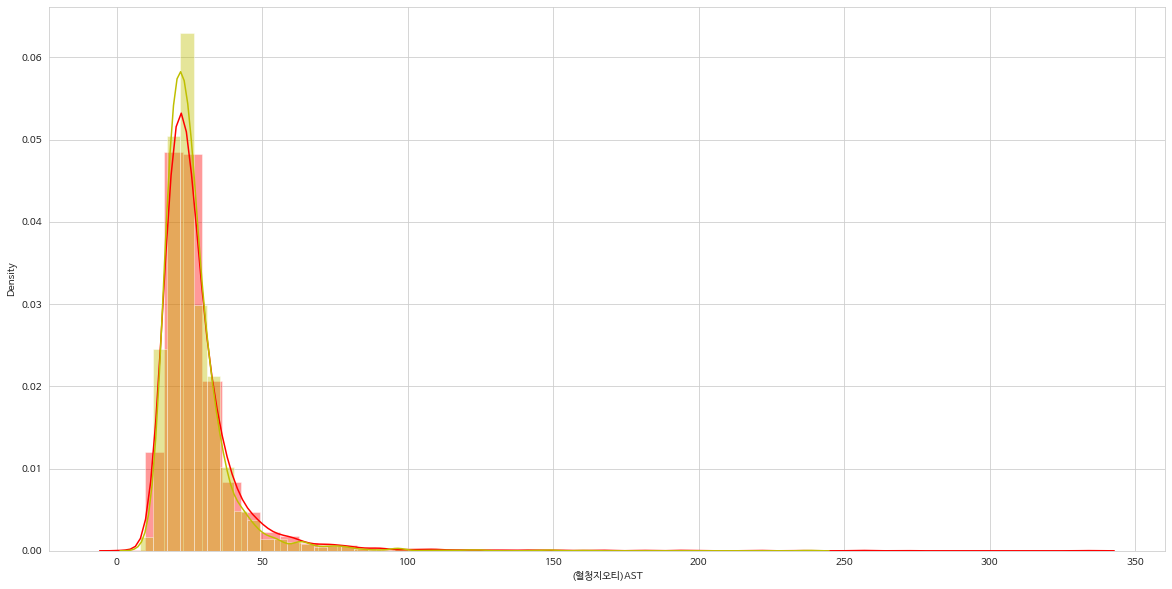

In [152]:
# 음주여부에 따른 AST/ALT/감마지티피 비교
sns.distplot(data2.loc[
    data2["(혈청지오티)AST"].notnull() & (data2["음주여부"] == 'Yes'), 
    "(혈청지오티)AST"], color = 'r')

sns.distplot(data2.loc[
    data2["(혈청지오티)AST"].notnull() & (data2["음주여부"] == 'No'), 
    "(혈청지오티)AST"], color = 'y')

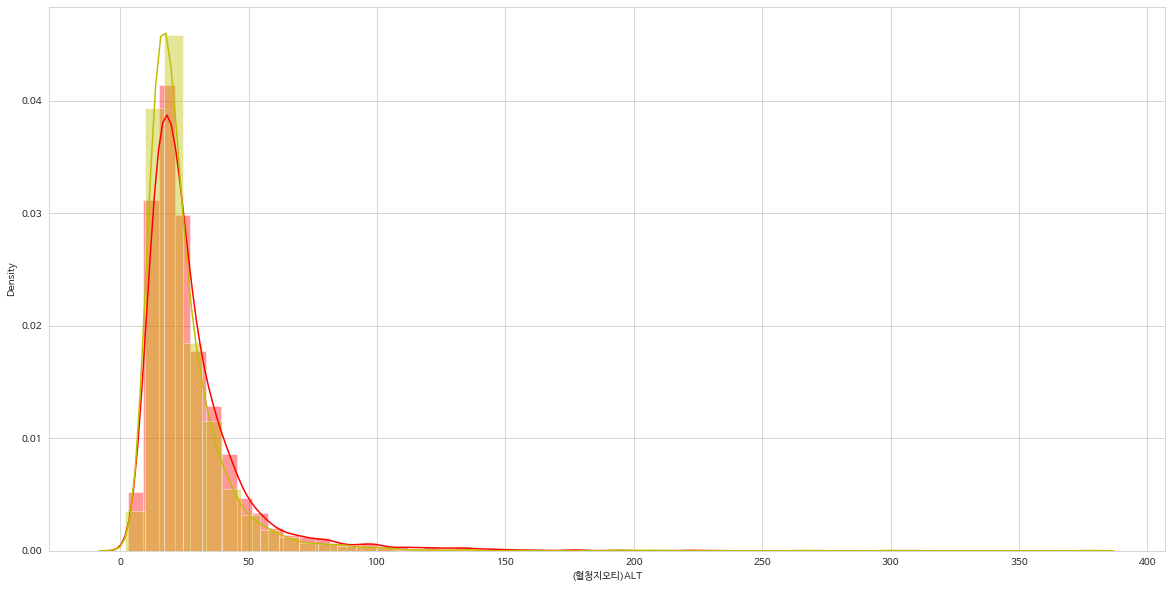

In [156]:
sns.distplot(data2.loc[
    data2["(혈청지오티)ALT"].notnull() & (data2["음주여부"] == 'Yes'), 
    "(혈청지오티)ALT"], color = 'r')

sns.distplot(data2.loc[
    data2["(혈청지오티)ALT"].notnull() & (data2["음주여부"] == 'No'), 
    "(혈청지오티)ALT"], color = 'y')

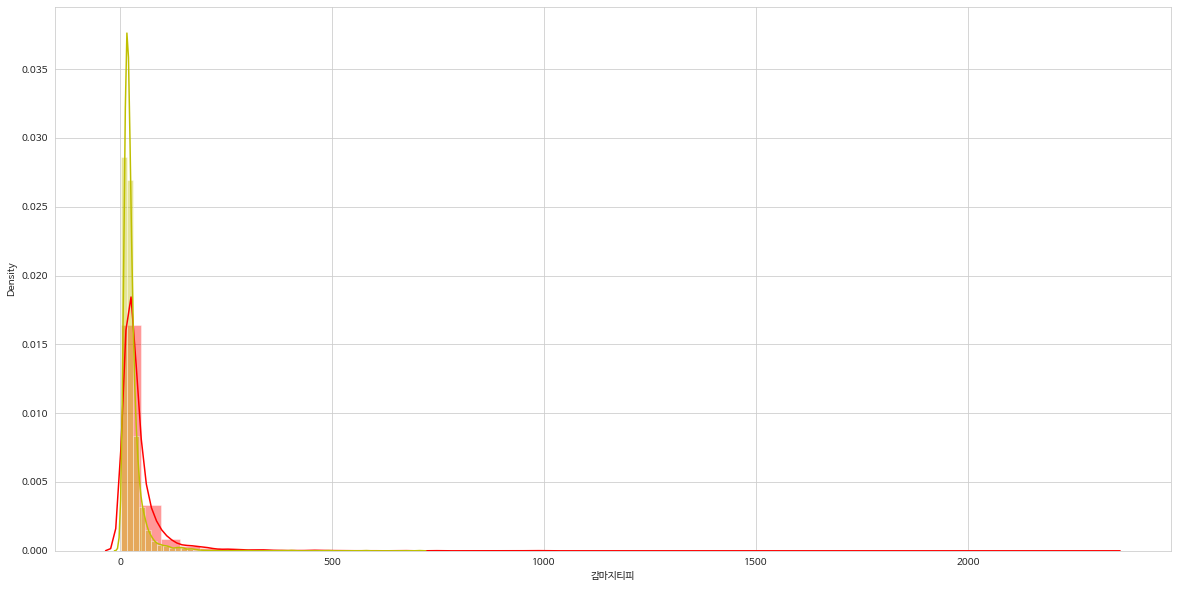

In [157]:
sns.distplot(data2.loc[
    data2["감마지티피"].notnull() & (data2["음주여부"] == 'Yes'), 
    "감마지티피"], color = 'r')

sns.distplot(data2.loc[
    data2["감마지티피"].notnull() & (data2["음주여부"] == 'No'), 
    "감마지티피"], color = 'y')

마찬가지로 그래프의 치우침을 확인해보면, AST/ALT/감마지티피 모두 빨강/노랑 즉 음주여부가 Yes/No 순서이다. 이는 음주를 하는 경우가 음주를 하지 않는 경우보다 간 기능의 척도인 AST, ALT, 감마지티피의 값이 모두 높다는 것을 확인할 수 있다.

## 3. 변수들의 상관계수 구하기

In [158]:
data3 = data1[['체중(5Kg 단위)','신장(5Cm단위)','(혈청지오티)AST', '(혈청지오티)ALT','감마지티피','흡연상태','음주여부','BMI 지수','비만판정','고혈압판정']]
data3['비만판정'] = data1['비만판정'].replace(['저체중','정상','과체중','비만'],[0,1,2,3])
data3['고혈압판정'] = data1['고혈압판정'].replace(['정상','주의혈압','고혈압 전단계','고혈압'],[0,1,2,3])

In [149]:
data_corr = data3.corr()

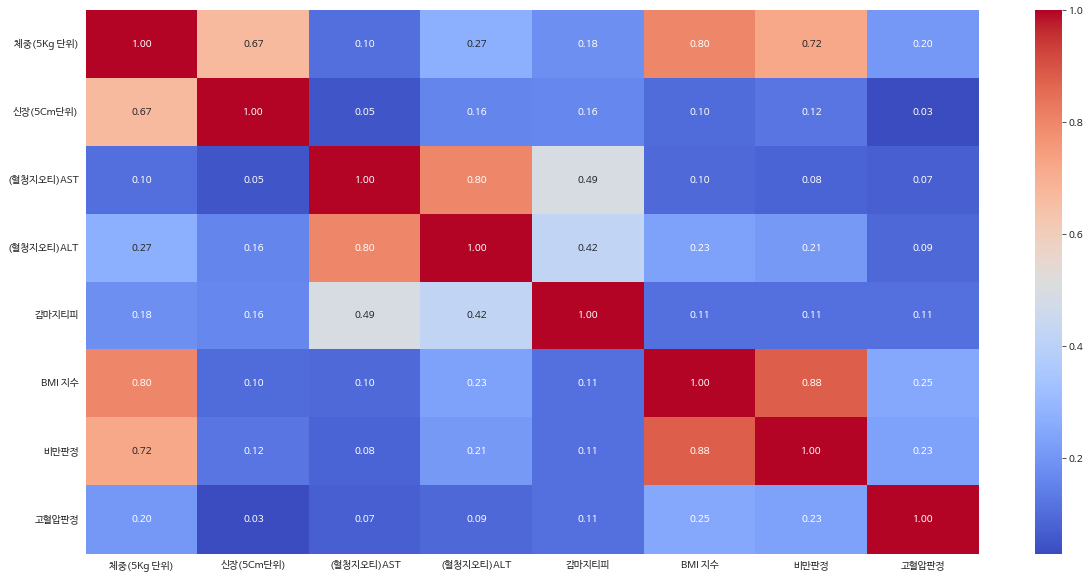

In [150]:
plt.figure(figsize=(20,10))
sns.heatmap(data_corr, annot=True, fmt=".2f", cmap="coolwarm")

첫번째 단계에서 비만판정과 고혈압판정에 사용했던 변수들과 두번째 단계에서 사용했던 간 기능 관련 변수들 간의 상관관계를 구했다. 큰 의미를 보이는 상관관계는 없는 것을 알 수 있다.

# 결론 : 3가지 인사이트

1. 비만도와 고혈압은 유의미한 관계를 보인다. 특히, 비만일 때 고혈압이 나타나는 경우가 많다. 따라서 건강검진 결과에서 비만과 고혈압이 함께 측정되면, 하나의 요인이 체중이라는 것을 알 수 있다.
2. 흡연과 음주 여부는 간에 영향을 준다. 간 기능 척도인 AST, ALT, 감마지티피 값 모두 흡연과 음주를 하는 경우에 높게 측정된다.
3. 하지만 모든 변수가 소수의 변수만으로 설명되지는 않는다. 상관관계를 보면 알 수 있듯이, 비만과 고혈압은 약한 양의 상관관계를 보인다. 만약 자신의 건강검진 결과에서 부정적인 수치가 나오면, 하나의 원인을 찾는 것보다 다양한 원인을 분석하여 통제하는 방법이 더 효율적일 수 있다.